## Week 3 Part 2 Assignment
Group Member:

Ahmed Elsaeyed
Noah Collin
Benson Toi

## Project Overview

What can you infer about the relationships between (1) the women, and (2) the social events?  

Brief Description : http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis

Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat

Code reference: https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html


## BACKGROUND 
These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

## REFERENCES

Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.
Davis, A et al. (1941). Deep South. Chicago: University of Chicago Press.

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite

In [81]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,10)

In [82]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

In [83]:
#Biadjacency matrix
print(bipartite.biadjacency_matrix(G, women, clubs))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_1133/2716515101.py:2: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(bipartite.biadjacency_matrix(G, women, clubs))


### Women Degree (Number of Friends from 18 Southern Women)

In [66]:
#project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("# of Friends, Member")

W_degrees = {}
for w in women:
    W_degrees[w] = W.degree(w)

for w in sorted(W_degrees, key=W_degrees.get, reverse=True):
  print(W_degrees[w], w)


# of Friends, Member
17 Evelyn Jefferson
17 Theresa Anderson
17 Ruth DeSand
17 Verne Sanderson
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Pearl Oglethorpe
16 Myra Liddel
16 Katherina Rogers
16 Dorothy Murchison
15 Laura Mandeville
15 Brenda Rogers
15 Frances Anderson
15 Eleanor Nye
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd


### Women Weight (Total Number of shared contact from 18 Southern Women)

In [67]:
#project bipartite graph onto women nodes keeping number of co-occurence
#the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
    
W_weights = {}
for w in women:
    W_weights[w] = W.degree(w, weight='weight')

for w in sorted(W_weights, key=W_weights.get, reverse=True):
    print(W_weights[w], w)


#Friend meetings, Member
57 Theresa Anderson
50 Evelyn Jefferson
46 Brenda Rogers
46 Sylvia Avondale
45 Laura Mandeville
43 Nora Fayette
40 Ruth DeSand
38 Verne Sanderson
37 Katherina Rogers
36 Eleanor Nye
34 Helen Lloyd
33 Myra Liddel
32 Frances Anderson
31 Pearl Oglethorpe
24 Charlotte McDowd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


From the Degree table, the range is 17-11 = 6. Seem all 18 southern women are almost equally connected.
After reviewing the weights table, the range is 57-14 = 43. That means not every southern woman has the same influence on each other. In contrast, Olivia and Flora have a lower amount of connections. 
Therefore, we can see the different connection strengths when we look at the degrees and weights table. 

## Women Network Graphs 

In [69]:
weights=[edata['weight'] for f,t,edata in W.edges(data=True)]

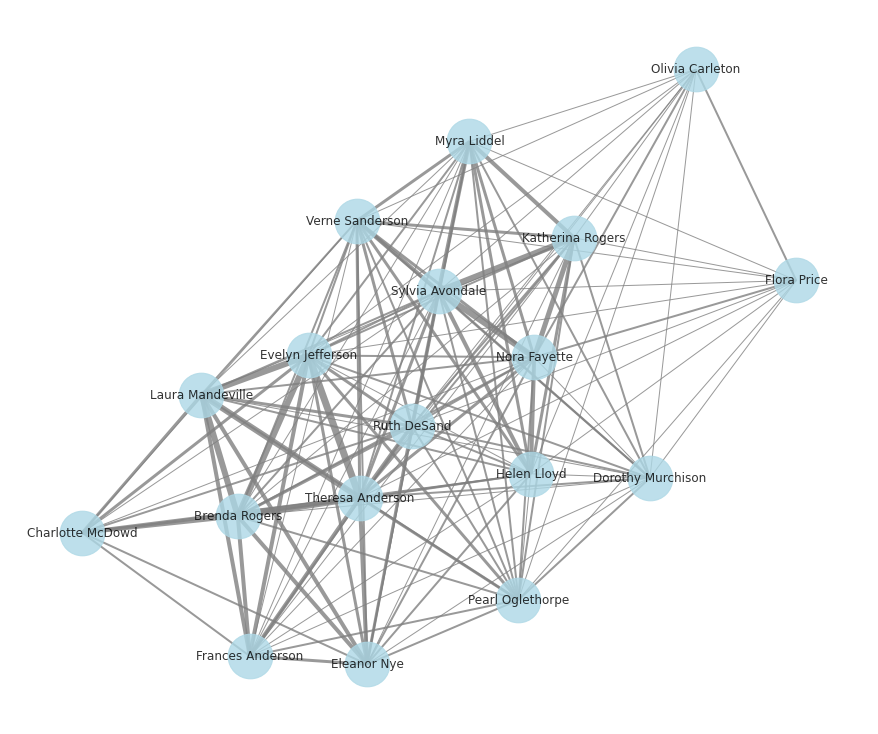

In [70]:
nx.draw(W, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_family="DejaVu Sans", 
                width=weights, edge_color="gray", alpha=0.8)

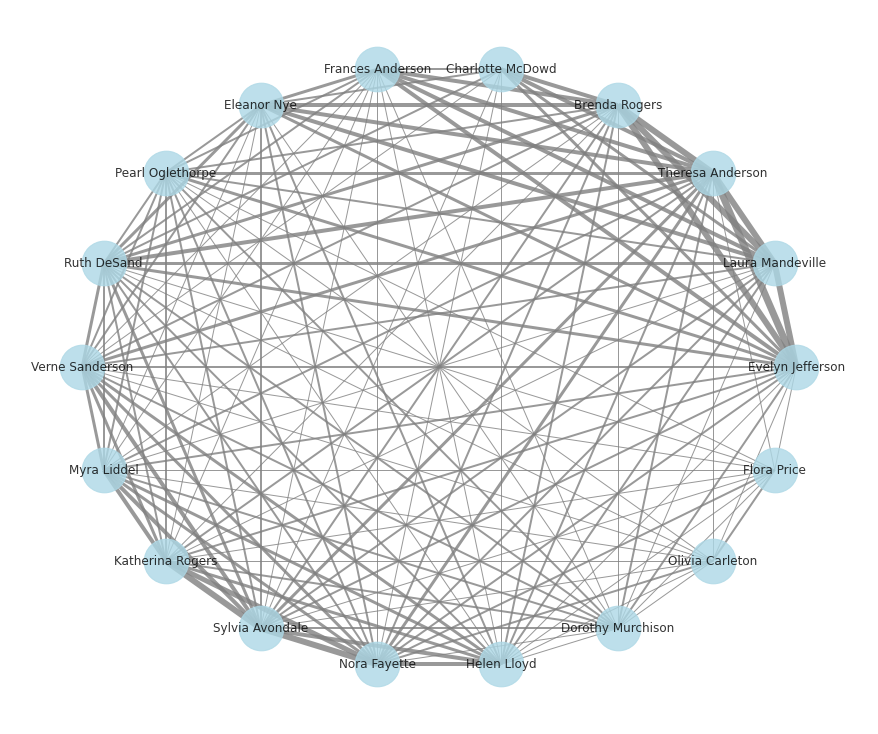

In [71]:
nx.draw_circular(W,width=weights, edge_color="gray", node_color="lightblue", with_labels=True, node_size=2000, font_size=12, font_family="calibri", 
                alpha=0.8) 

To understand the relationship between 18 southern women. 
The circular network graph provides us more clearly that Flora, Olivia, and Dorothy are the least connected compared to other women. 

### Club Degrees

In [72]:

# project bipartite graph onto club nodes
C = bipartite.projected_graph(G, clubs)
print('')
print("#Clubs")
    
C_degrees = {}
for c in clubs:
    C_degrees[c] = C.degree(c)

for c in sorted(C_degrees, key=C_degrees.get, reverse=True):
  print(C_degrees[c], c)


#Clubs
13 E6
13 E7
13 E8
13 E9
8 E1
8 E2
8 E3
8 E4
8 E5
8 E10
8 E11
8 E12
8 E13
8 E14


### Club Weights

In [73]:

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
C1 = bipartite.weighted_projected_graph(G, clubs)
print('')
print("#Club attendance, Clubs")

C_weights = {}
for c in clubs:
    C_weights[c] = C1.degree(c, weight='weight')

for c in sorted(C_weights, key=C_weights.get, reverse=True):
  print(C_weights[c], c)


#Club attendance, Clubs
59 E8
48 E7
46 E9
41 E6
38 E5
32 E3
28 E12
25 E10
23 E4
20 E2
19 E1
18 E13
18 E14
13 E11


From the Degree table, the range is 13-8 = 5. Seem all 18 And weights table; the range is 59-13 = 46. Similarly, we found from women's degrees and weights. The club E13, 14, and 11 are the least number of connections.

## Club Network Graphs 

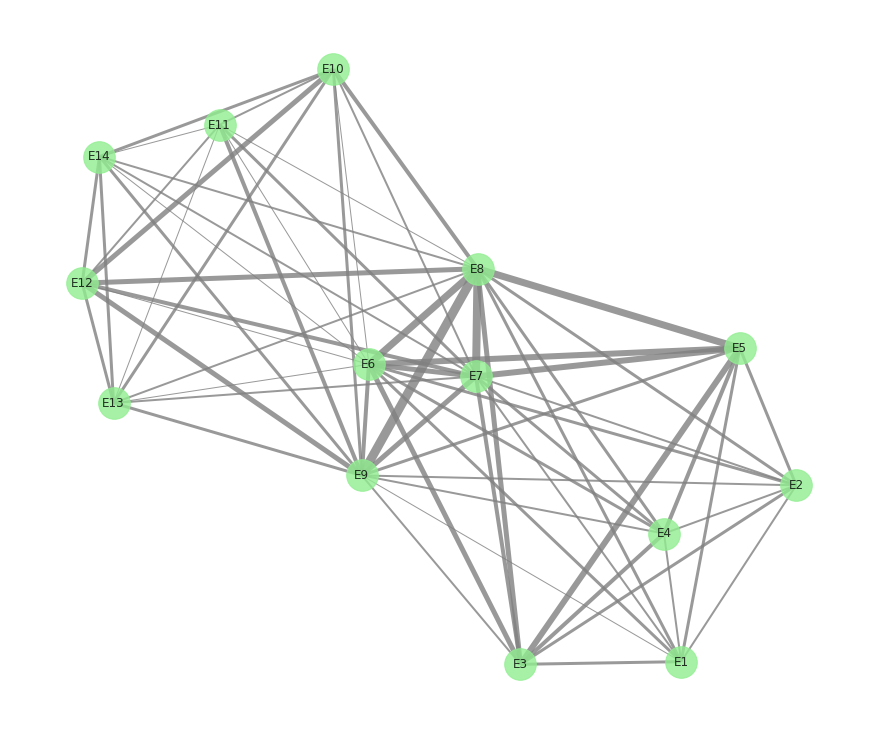

In [74]:

weights=[edata['weight'] for f,t,edata in C1.edges(data=True)]
nx.draw(C,with_labels=True, node_size=1000, node_color="lightgreen", font_size=12, font_family="DejaVu Sans", 
                width=weights, edge_color="gray", alpha=0.8)

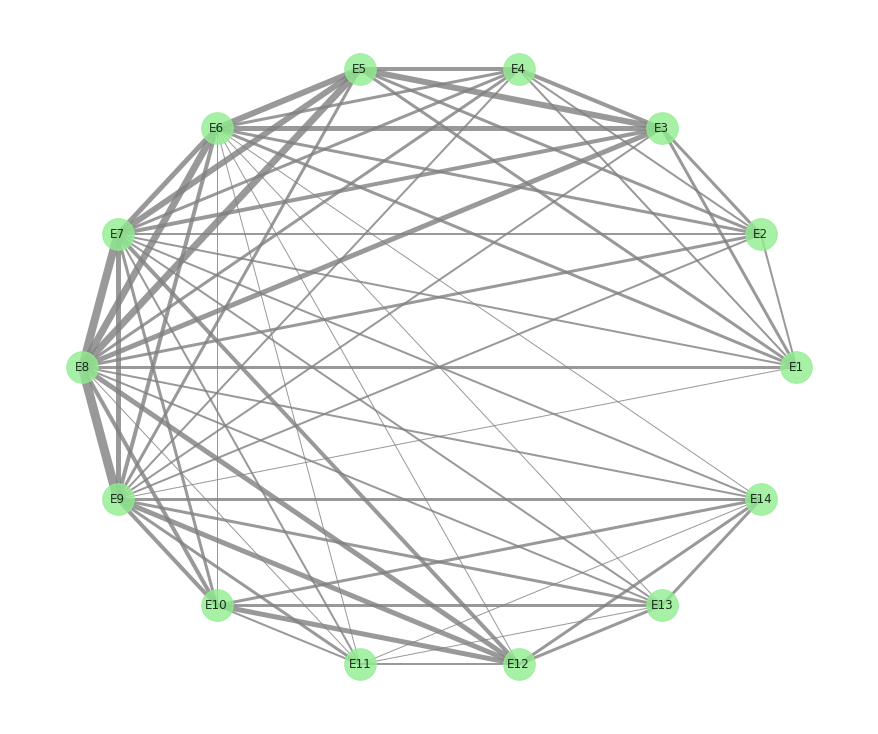

In [75]:
nx.draw_circular(C1, width=weights, edge_color="gray", node_color="lightgreen", with_labels=True, node_size=1000, font_size=12, font_family="calibri", 
                alpha=0.8) 

In [ ]:
From the circular network graph provides us more clearly that E11, E13, E1, and E14 are the least connected compared to other club. 

## Bimodal Graphs
### To understand the connection women and club

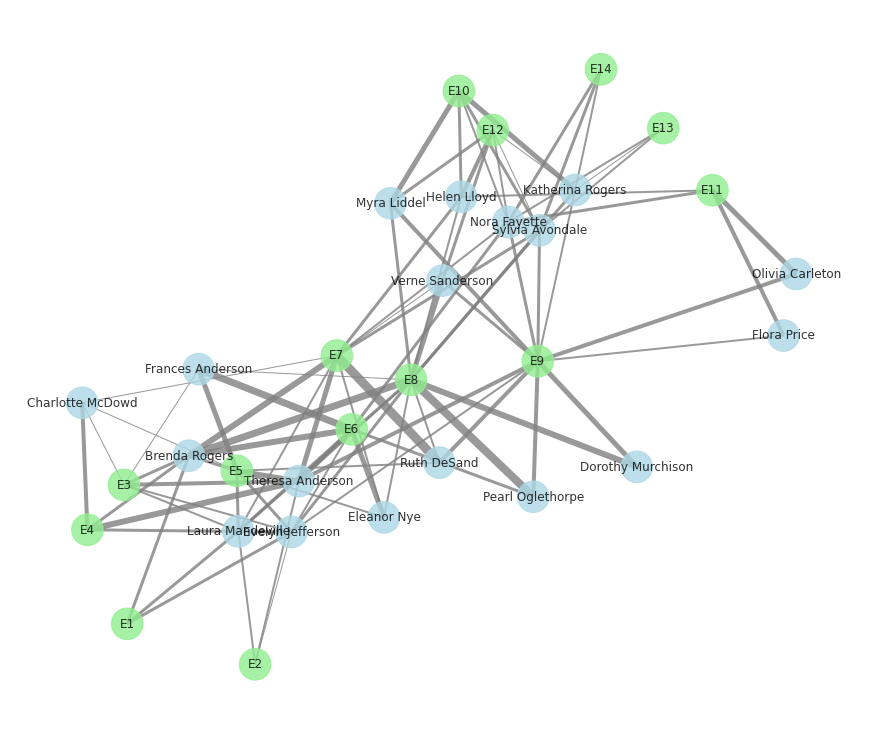

In [76]:

colors = []
for node, data in G.nodes(data=True):
    if data['bipartite'] == 1:
        colors.append('lightgreen')         
    else:
        colors.append('lightblue')

nx.draw(G, with_labels=True, node_size=1000, node_color=colors, font_size=12, font_family="DejaVu Sans", 
                 width=weights, edge_color="gray", alpha=0.8)

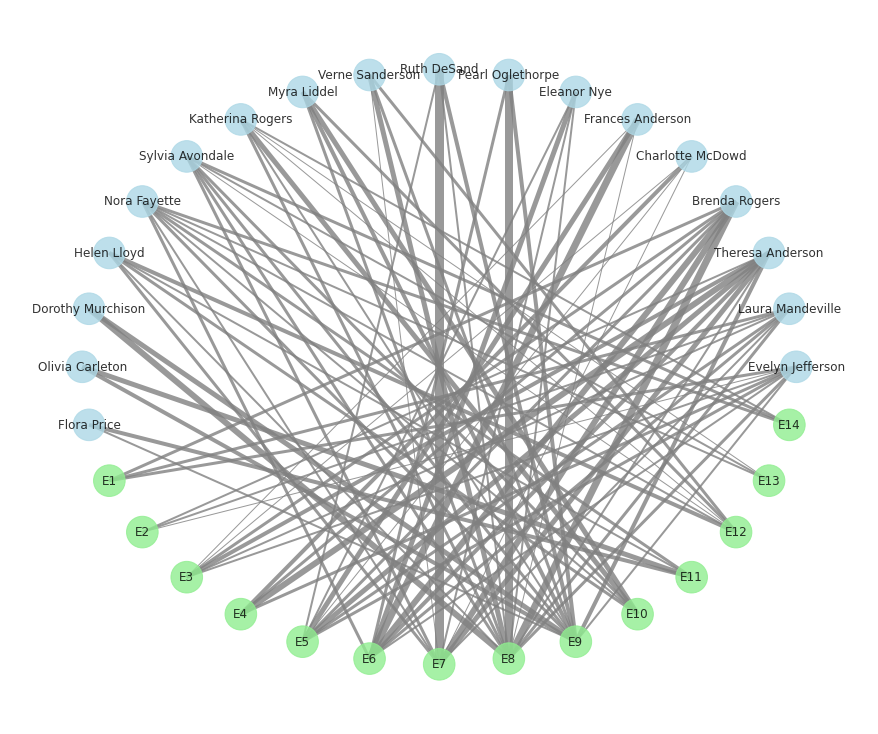

In [77]:
#draw_circular layout
nx.draw_circular(G, with_labels=True, node_size=1000, node_color=colors, font_size=12, font_family="DejaVu Sans", 
                 width=weights, edge_color="gray", alpha=0.8)


While looking at two different layout graphs, the most active and influential participants in the club can easily be found. 

### Conclusion:
    - Based on the graph observation, Theresa Anderson, Brenda Rogers, and Evelyn Jefferson are the clubs' most active and influential participants.
    - Flora Price, Olivia Carleton, Dorothy Murchison, and Charlotte McDowd are the club's least active and influential participants.
    - We found Club E8, E6, and E9 are the famous clubs for women.
    - Also, E2, E1 and E13 are least popular clubs.
### Highlight:
    - Although Flora Price, Olivia Carleton, and Dorothy Murchison are not so active in the club, they will go to Club E9.
    - Theresa Anderson, Brenda Rogers, and Evelyn Jefferson will attend the unfamous club E1.